In [ ]:
# Core / data handling
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & utilities
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Classical time-series / stats
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prophet (additive seasonal model)
# pip install prophet
from prophet import Prophet

# # Machine learning / gradient boosters
# import xgboost as xgb
# import lightgbm as lgb

# Deep learning (LSTM, CNN, etc.)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data=pd.read_csv("dataset3.csv")
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [ ]:
df=data.copy()
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0000
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0000
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0000
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0000
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0000
PM2.5,34151.0,79.491602,81.231739,2.0000,19.00,55.0,112.00,941.0000
PM10,34516.0,98.737026,89.143718,2.0000,31.00,77.0,138.00,999.0000
SO2,33768.0,13.572039,19.572068,0.2856,2.00,5.0,17.00,239.0000
NO2,33699.0,43.908865,30.996828,2.0000,19.00,37.0,62.00,258.0000
CO,32886.0,1187.063979,1156.374102,100.0000,400.00,800.0,1500.00,10000.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


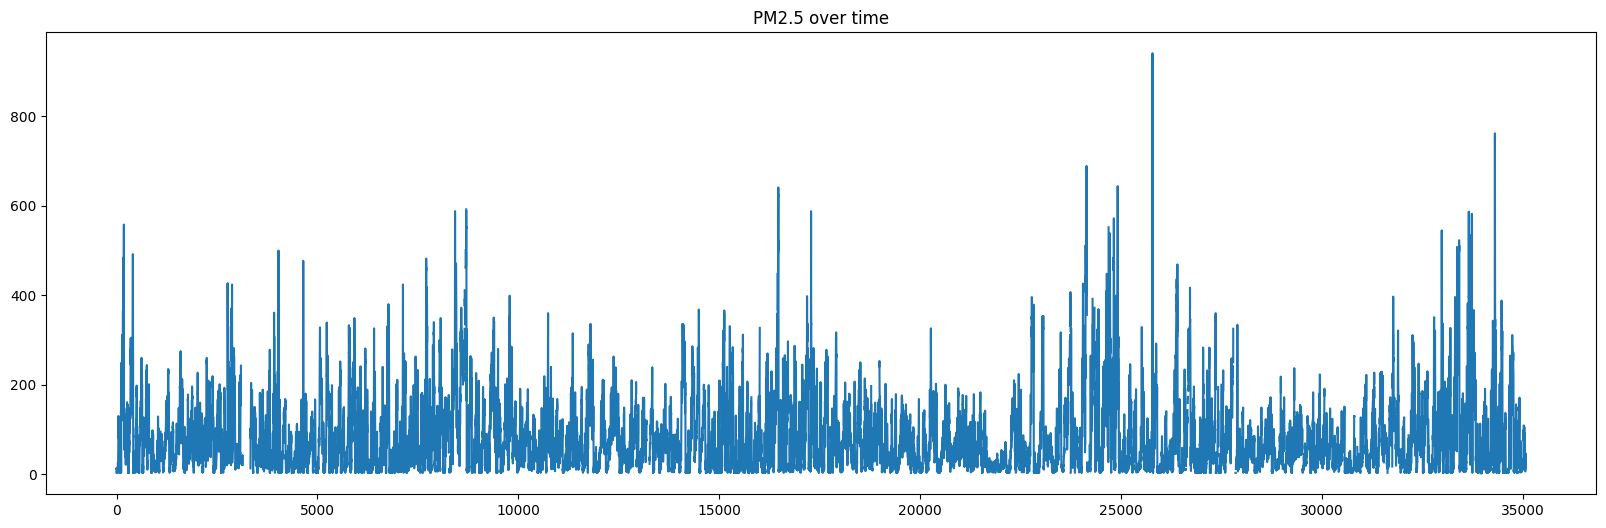

In [ ]:
df["PM2.5"].plot(title="PM2.5 over time", figsize=(20,6))
plt.show()

In [ ]:
#datetime indexing
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])
df = df.set_index('datetime')
df = df.drop(columns=['year','month','day','hour','No','station'])
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
datetime,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5


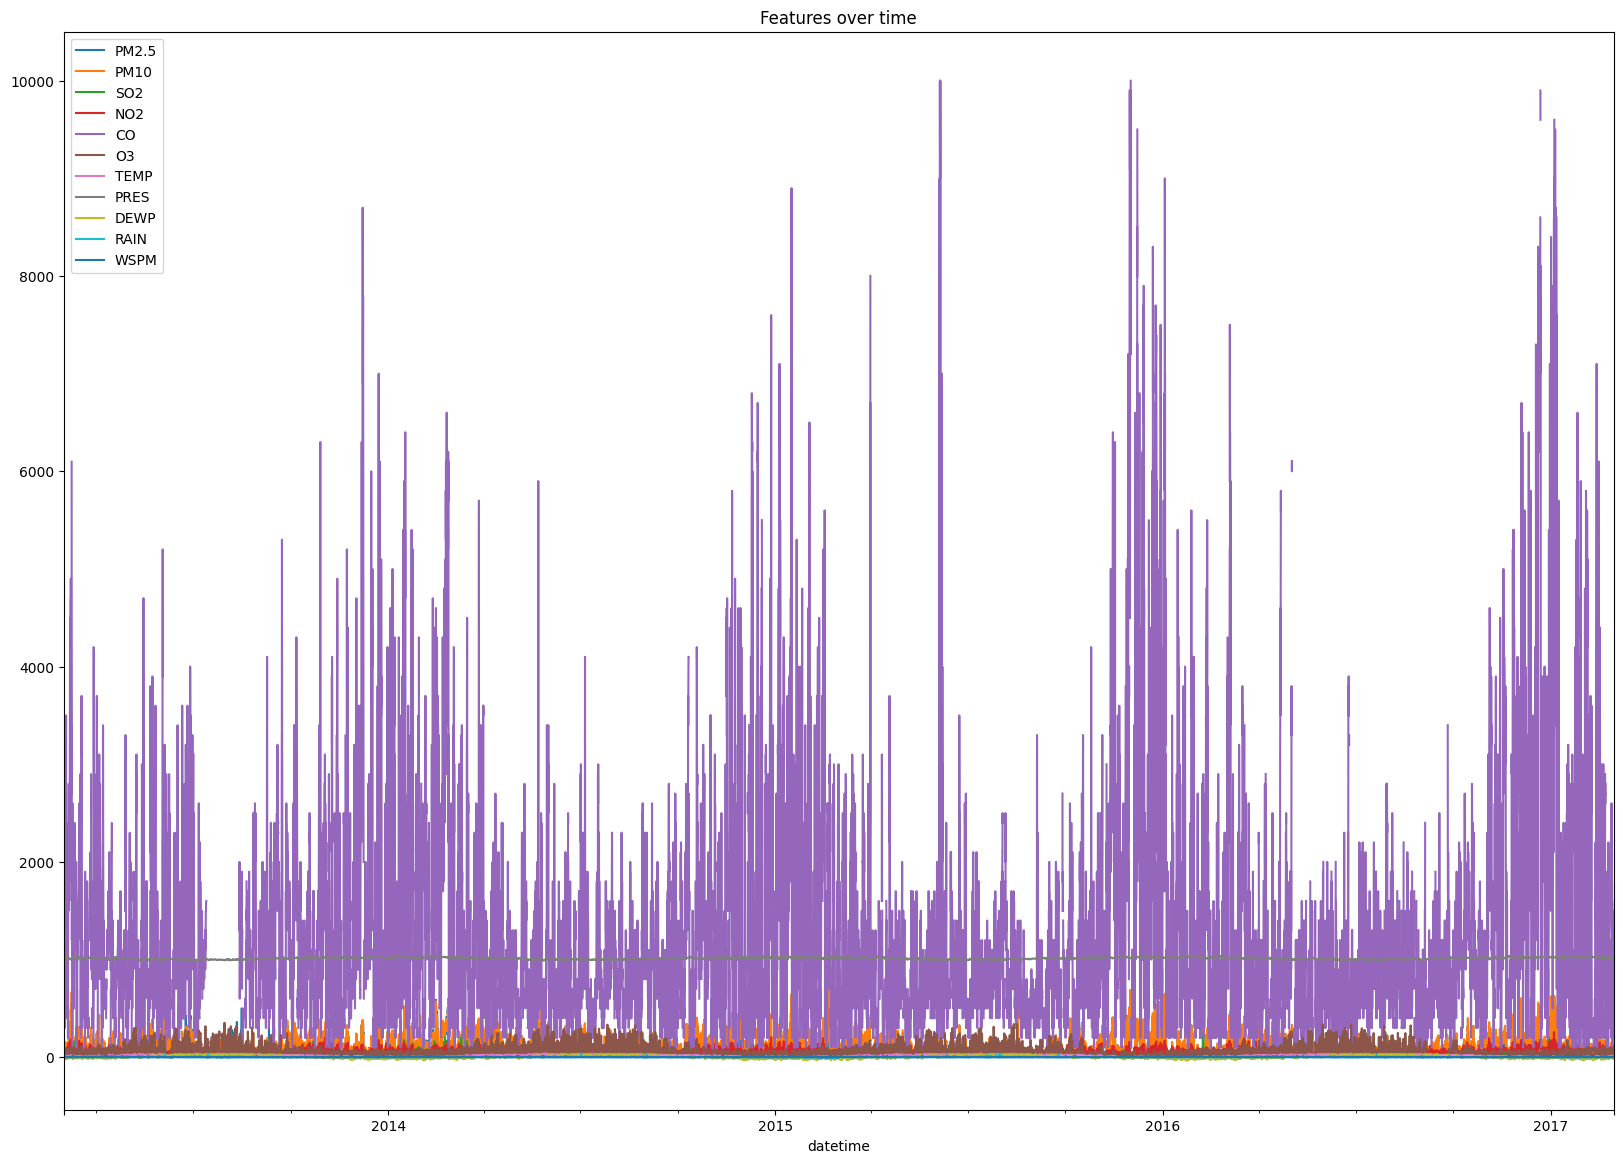

In [ ]:
df.plot(title="Features over time", figsize=(20,14))
plt.show()

In [ ]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
datetime,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5


In [ ]:
df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [ ]:
df.isnull().sum()

PM2.5     913
PM10      548
SO2      1296
NO2      1365
CO       2178
O3       1489
TEMP       51
PRES       51
DEWP       54
RAIN       51
wd        483
WSPM       44
dtype: int64

In [ ]:
df.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [ ]:
df= df.asfreq("h") #hour
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
datetime,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6
2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5


In [ ]:
# Interpolate pollutants
df['PM2.5'] = df['PM2.5'].interpolate(method='time')
df['PM10']  = df['PM10'].interpolate(method='time')
df['SO2']   = df['SO2'].interpolate(method='time')
df['NO2']   = df['NO2'].interpolate(method='time')
df['CO']    = df['CO'].interpolate(method='time')
df['O3']    = df['O3'].interpolate(method='time')

# Same for meteorological vars
df['TEMP'] = df['TEMP'].interpolate(method='time')
df['PRES'] = df['PRES'].interpolate(method='time')
df['DEWP'] = df['DEWP'].interpolate(method='time')

In [ ]:
df.isnull().sum()

PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN      51
wd       483
WSPM      44
dtype: int64

In [ ]:
df[['RAIN','wd','WSPM']].head()

,RAIN,wd,WSPM
datetime,,,
2013-03-01 00:00:00,0.0,NW,9.3
2013-03-01 01:00:00,0.0,NW,9.4
2013-03-01 02:00:00,0.0,NW,8.6
2013-03-01 03:00:00,0.0,NW,6.6
2013-03-01 04:00:00,0.0,NW,4.5


In [ ]:
# Forward/backward fill for remaining gaps
df = df.fillna(method='ffill').fillna(method='bfill')
df.head()

C:\Users\Yvonne\AppData\Local\Temp\ipykernel_9888\1251630545.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
datetime,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2013-03-01 02:00:00,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,200.0,16.5,-2.1,1027.3,-23.3,0.0,NW,6.6
2013-03-01 04:00:00,12.0,12.0,3.0,6.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5


In [ ]:
df.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
#unique category column values
print(df['wd'].unique())

['NW' 'NNW' 'NNE' 'NE' 'SSW' 'ENE' 'N' 'E' 'SW' 'WNW' 'S' 'W' 'SE' 'ESE'
 'WSW' 'SSE']


In [ ]:
# Wind Direction Encoding
wind_map = {'N':0,'NE':45,'E':90,'SE':135,'S':180,'SW':225,'W':270,'NW':315}
df['wd_deg'] = df['wd'].map(wind_map)

# Cyclical features
df['wd_sin'] = np.sin(np.deg2rad(df['wd_deg']))
df['wd_cos'] = np.cos(np.deg2rad(df['wd_deg']))

df = df.drop(columns=['wd','wd_deg'])
df.head()


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_sin,wd_cos
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,9.3,-0.707107,0.707107
2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,9.4,-0.707107,0.707107
2013-03-01 02:00:00,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,8.6,-0.707107,0.707107
2013-03-01 03:00:00,12.0,12.0,3.0,5.0,200.0,16.5,-2.1,1027.3,-23.3,0.0,6.6,-0.707107,0.707107
2013-03-01 04:00:00,12.0,12.0,3.0,6.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,4.5,-0.707107,0.707107


In [ ]:
# # Outlier Check 
# pollutants = ['PM2.5','PM10','SO2','NO2','CO','O3']
# for col in pollutants:
#     plt.figure(figsize=(8,2))
#     sns.boxplot(x=df[col])
#     plt.title(f"Outliers in {col}")
#     plt.show()

#Outlier capping
# for col in pollutants:
#     q1, q3 = df[col].quantile([0.25, 0.75])
#     iqr = q3 - q1
#     lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
#     df[col] = df[col].clip(lower, upper)

C:\Users\Yvonne\AppData\Local\Temp\ipykernel_9888\1575135324.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M").mean()[["PM2.5","PM10","SO2","NO2","CO","O3"]].plot()


<Figure size 1400x600 with 0 Axes>

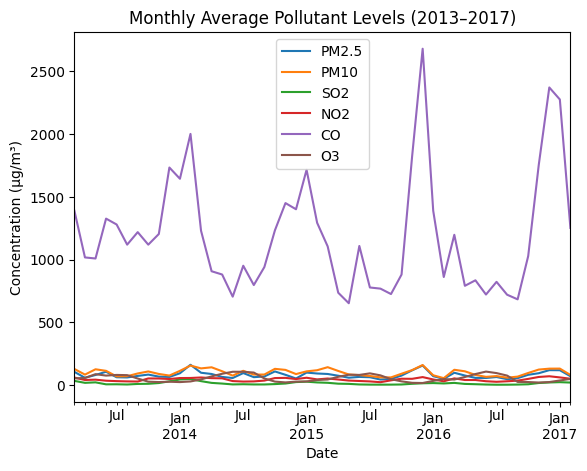

In [ ]:
#EDA

#Overall Trends Across Time
plt.figure(figsize=(14,6))
df.resample("M").mean()[["PM2.5","PM10","SO2","NO2","CO","O3"]].plot()
plt.title("Monthly Average Pollutant Levels (2013–2017)")
plt.ylabel("Concentration (µg/m³)")
plt.xlabel("Date")
plt.legend()
plt.show()

In [ ]:
# Rolling mean & std (window=24 hours for daily smoothing)
rolling_mean = df['PM2.5'].rolling(window=24).mean()
rolling_std = df['PM2.5'].rolling(window=24).std()

# plt.figure(figsize=(12,6))
# plt.plot(df['PM2.5'], color='blue', label='Original')
# plt.plot(rolling_mean, color='red', label='Rolling Mean (24h)')
# plt.plot(rolling_std, color='black', label='Rolling Std (24h)')
# plt.title("PM2.5 Rolling Statistics")
# plt.legend()
# plt.show()

In [ ]:
# Time-based features 
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)

# Lag features 
df['PM2.5_lag_1'] = df['PM2.5'].shift(1)    # t-1
df['PM2.5_lag_2'] = df['PM2.5'].shift(2)    # t-2
df['PM2.5_lag_3'] = df['PM2.5'].shift(3)    # t-3
df['PM2.5_lag_24'] = df['PM2.5'].shift(24)  # Daily seasonality

# Meteorological features (current measurements - SAFE)
df['dew_point_diff'] = df['TEMP'] - df['DEWP']

In [ ]:
df.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM', 'wd_sin', 'wd_cos', 'hour', 'day_of_week', 'month',
       'is_weekend', 'PM2.5_lag_1', 'PM2.5_lag_2', 'PM2.5_lag_3',
       'PM2.5_lag_24', 'dew_point_diff'],
      dtype='object')

In [ ]:
# target = ['PM2.5']

# feature_cols = ['PM10', 'SO2', 'NO2', 'CO', 'O3',
#                 'TEMP', 'PRES', 'DEWP','RAIN', 
#                 'WSPM', 'wd_sin', 'wd_cos', 'hour',
#                 'day_of_week', 'month','is_weekend',
#                 'PM2.5_lag_1', 'PM2.5_lag_2', 'PM2.5_lag_3',
#                 'PM2.5_lag_24', 'dew_point_diff']

In [ ]:
#defining X,y features
target = 'PM2.5'
feature_cols = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd_sin', 'wd_cos']

In [ ]:
df.isnull().sum()

PM2.5                 0
PM10                  0
SO2                   0
NO2                   0
CO                    0
O3                    0
TEMP                  0
PRES                  0
DEWP                  0
RAIN                  0
WSPM                  0
wd_sin            16524
wd_cos            16524
hour                  0
day_of_week           0
month                 0
is_weekend            0
PM2.5_lag_1           1
PM2.5_lag_2           2
PM2.5_lag_3           3
PM2.5_lag_24         24
dew_point_diff        0
dtype: int64

In [ ]:
df = df.ffill().bfill()

In [ ]:
df.isnull().sum()

PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP              0
PRES              0
DEWP              0
RAIN              0
WSPM              0
wd_sin            0
wd_cos            0
hour              0
day_of_week       0
month             0
is_weekend        0
PM2.5_lag_1       0
PM2.5_lag_2       0
PM2.5_lag_3       0
PM2.5_lag_24      0
dew_point_diff    0
dtype: int64

In [ ]:
df.shape

(35064, 22)

In [ ]:
#train/test split
size= int(len(df)*0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [ ]:
print(df_train.tail())
print(df_test.head())

                     PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
datetime                                                                       
2016-05-12 14:00:00   10.0  12.0  2.0  12.0  200.0  76.0  18.0  1010.4  -0.8   
2016-05-12 15:00:00    8.0   8.0  2.0  12.0  200.0  80.0  19.9  1010.2  -1.3   
2016-05-12 16:00:00    5.0   8.0  2.0  10.0  100.0  85.0  20.8  1010.6  -2.4   
2016-05-12 17:00:00    7.0   7.0  2.0  11.0  100.0  86.0  21.2  1010.9  -4.1   
2016-05-12 18:00:00    6.0  30.0  2.0  15.0  100.0  85.0  20.9  1011.5  -3.6   

                     RAIN  ...    wd_cos  hour  day_of_week  month  \
datetime                   ...                                       
2016-05-12 14:00:00   0.0  ...  0.707107    14            3      5   
2016-05-12 15:00:00   0.0  ...  0.707107    15            3      5   
2016-05-12 16:00:00   0.0  ...  0.707107    16            3      5   
2016-05-12 17:00:00   0.0  ...  0.707107    17            3      5   
2016-05-12 18:00:00

In [ ]:
#further definition
X_train = df_train[feature_cols] 
y_train = df_train[target] 
X_test = df_test[feature_cols] 
y_test = df_test[target]

print(f"Train size: {len(df_train)}")
print(f"Test size: {len(df_test)}")
print(f"Train period: {df_train.index.min()} to {df_train.index.max()}")
print(f"Test period: {df_test.index.min()} to {df_test.index.max()}")

Train size: 28051
Test size: 7013
Train period: 2013-03-01 00:00:00 to 2016-05-12 18:00:00
Test period: 2016-05-12 19:00:00 to 2017-02-28 23:00:00


In [ ]:
#Check for any remaining missing values 
print(f"\nMissing values in training features: {X_train.isnull().sum().sum()}") 
print(f"Missing values in training target: {y_train.isnull().sum()}")
print(f"Missing values in test features: {X_test.isnull().sum().sum()}")
print(f"Missing values in test target: {y_test.isnull().sum()}")


Missing values in training features: 0
Missing values in training target: 0
Missing values in test features: 0
Missing values in test target: 0


In [ ]:
#Basic statistics of the target variable 
print(f"Target variable ({target}) statistics:")
print(y_train.describe())

Target variable (PM2.5) statistics:
count    28051.000000
mean        80.249553
std         81.345660
min          3.000000
25%         19.000000
50%         55.000000
75%        113.000000
max        941.000000
Name: PM2.5, dtype: float64


In [ ]:
# Time series specific plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Statistical tests for stationarity 
from statsmodels.tsa.stattools import adfuller, kpss 

# Classical time series models
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# Machine learning models 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import TimeSeriesSplit, cross_val_score 


# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error 
# import arff 
import pandas as pd

In [ ]:
#generating white noise
white_noise= np.random.normal(
    loc = y_train.mean(), #constant mean-center (mean) of distribution
    scale = y_train.std(), #constant std -  spread (std dev) of distribution
    size=len(y_train) #same length as your data
)

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
#creating col 
y_train.rename(columns={'PM2.5':'PM2.5'}, inplace=True)

In [ ]:
y_train['white_noise']= white_noise

In [ ]:
y_train.columns

Index(['PM2.5', 'white_noise'], dtype='object')

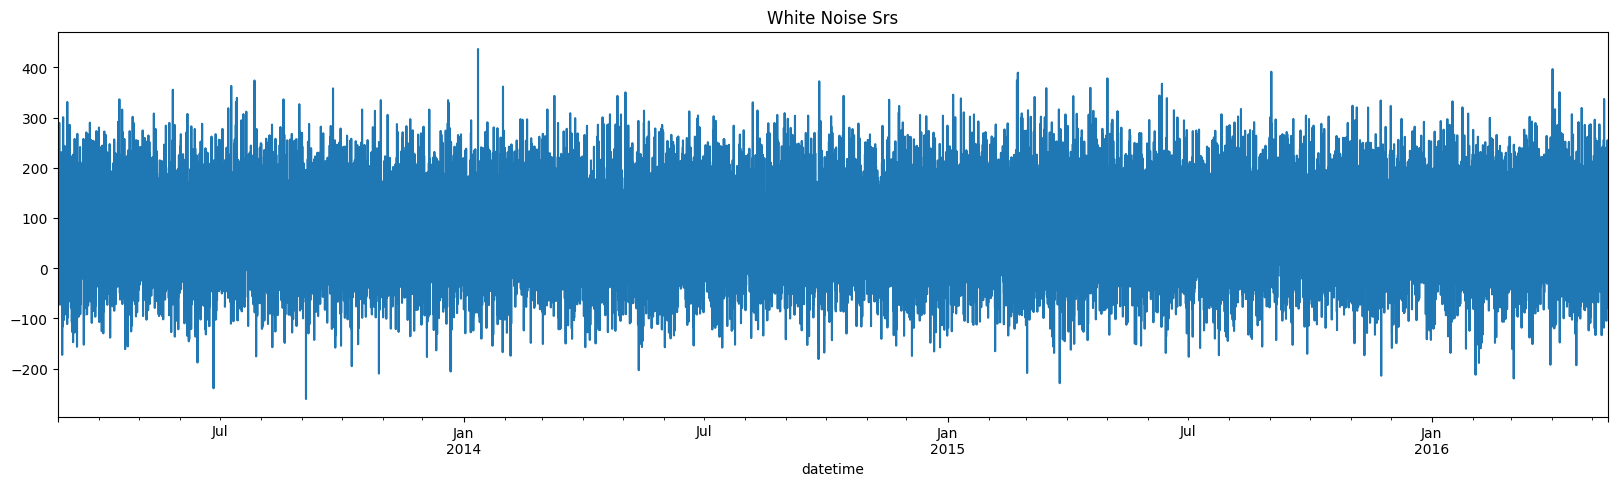

In [ ]:
y_train.white_noise.plot(figsize=(20,5))
plt.title("White Noise Srs")
plt.show()

In [ ]:
y_train = y_train['PM2.5']

C:\Users\Yvonne\AppData\Local\Temp\ipykernel_9888\1799069242.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = y_train.resample('M').mean()
C:\Users\Yvonne\AppData\Local\Temp\ipykernel_9888\1799069242.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_year = year_data.resample('M').mean()


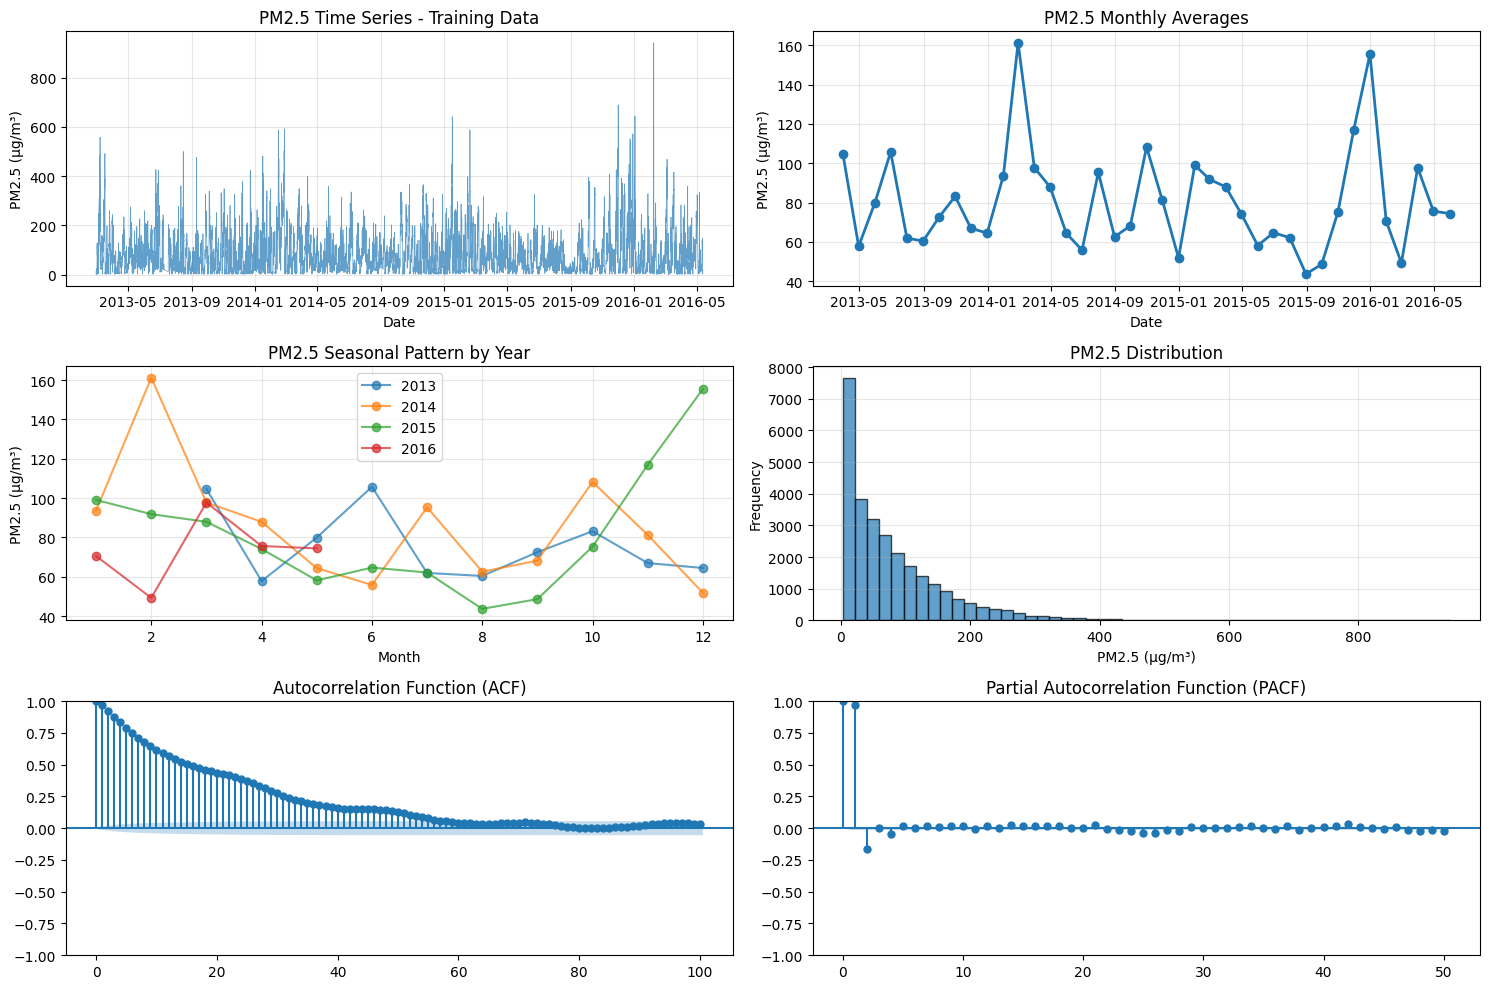

In [ ]:
#Time series visualization and stationarity testing
plt.figure(figsize=(15, 10))

#Plot 1: Full time series
plt.subplot(3, 2, 1)
plt.plot(y_train.index, y_train.values, alpha=0.7, linewidth=0.5)
plt.title(f'{target} Time Series - Training Data')
plt.xlabel('Date')
plt.ylabel(f'{target} (μg/m³)')
plt.grid(True, alpha=0.3)

#Plot 2: Monthly averages to see seasonal patterns 
monthly_avg = y_train.resample('M').mean() 
plt.subplot(3, 2, 2) 
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2) 
plt.title(f'{target} Monthly Averages') 
plt.xlabel('Date')
plt.ylabel(f'{target} (μg/m³)')
plt.grid(True, alpha=0.3)

#Plot 3: Seasonal decomposition-like plot (yearly pattern) 
plt.subplot(3, 2, 3) 
for year in range(2013, 2017): 
    year_data = y_train[y_train.index.year == year] 
    if len(year_data) > 0:
        monthly_year = year_data.resample('M').mean()
        plt.plot(monthly_year.index.month, monthly_year.values, marker='o', label=f'{year}', alpha=0.7)
plt.title(f'{target} Seasonal Pattern by Year') 
plt.xlabel('Month') 
plt.ylabel(f'{target} (μg/m³)') 
plt.legend() 
plt.grid(True, alpha=0.3)

#Plot 4: Distribution 
plt.subplot(3, 2, 4)
plt.hist(y_train.values, bins=50, alpha=0.7, edgecolor='black')
plt.title(f'{target} Distribution')
plt.xlabel(f'{target} (μg/m³)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3) 

# Plot 5: ACF
plt.subplot(3, 2, 5) 
plot_acf(y_train.values, lags=100, ax=plt.gca(), alpha=0.05) 
plt.title('Autocorrelation Function (ACF)') 

# Plot 6: PACF 
plt.subplot(3, 2, 6) 
plot_pacf(y_train.values, lags=50, ax=plt.gca(), alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout() 
plt.show()

### **checking stationarity**

In [ ]:
import statsmodels.tsa.stattools as sts

In [ ]:
#use ADF or KPSS
#-Null of ADF test assumes non-stationarity  (p>0.05)
#- p-value > 0.05 → Fail to reject H₀ → series is non-stationary
# p-value ≤ 0.05 → Reject H₀ → series is stationary
sts.adfuller(y_train)

(np.float64(-17.683388485121917),
 np.float64(3.59956851455139e-30),
 50,
 28000,
 {'1%': np.float64(-3.430583567842904),
  '5%': np.float64(-2.8616432304023345),
  '10%': np.float64(-2.566824946440051)},
 np.float64(249066.90723919543))

***insight:***
-less than 0.05 thus ***stationary***

In [ ]:
# y_train['white_noise']= white_noise

In [ ]:
# sts.adfuller(y_train.white_noise)
# #definitely zero, it was defined in white_noise 

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
# y_train = y_train['PM2.5']

In [ ]:
# y_train = y_train.squeeze()   # convert to Series if it's just one column

In [ ]:
y_train

,PM2.5
datetime,
2013-03-01 00:00:00,3.0
2013-03-01 01:00:00,12.0
2013-03-01 02:00:00,14.0
2013-03-01 03:00:00,12.0
2013-03-01 04:00:00,12.0
...,...
2016-05-12 14:00:00,10.0
2016-05-12 15:00:00,8.0
2016-05-12 16:00:00,5.0


In [ ]:
# y_train=pd.to_numeric(y_train, errors="coerce") 

In [ ]:
# Augmented Dickey-Fuller Test (with all values given and clear result)
print("Augmented Dickey-Fuller Test:")
adf_result = adfuller(y_train.dropna(), autolag='AIC')
print(f'ADF Statistic: {adf_result[0]:.6f}')
print(f'p-value: {adf_result[1]:.6f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value:.3f}')

if adf_result[1] <= 0.05:
    print("Reject null hypothesis. Time series is stationary.")
else:
    print("Time series is non-stationary.")


Augmented Dickey-Fuller Test:
ADF Statistic: -17.683388
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject null hypothesis. Time series is stationary.


In [ ]:
#Determine rolling statistics
rolmean = y_train.rolling(window=24).mean() #window size 12 denotes 24 hours, giving rolling mean at hourly level
rolstd = y_train.rolling(window=12).std()
print(rolmean,rolstd)

                         PM2.5
datetime                      
2013-03-01 00:00:00        NaN
2013-03-01 01:00:00        NaN
2013-03-01 02:00:00        NaN
2013-03-01 03:00:00        NaN
2013-03-01 04:00:00        NaN
...                        ...
2016-05-12 14:00:00  71.375000
2016-05-12 15:00:00  66.250000
2016-05-12 16:00:00  60.958333
2016-05-12 17:00:00  56.041667
2016-05-12 18:00:00  51.375000

[28051 rows x 1 columns]                          PM2.5
datetime                      
2013-03-01 00:00:00        NaN
2013-03-01 01:00:00        NaN
2013-03-01 02:00:00        NaN
2013-03-01 03:00:00        NaN
2013-03-01 04:00:00        NaN
...                        ...
2016-05-12 14:00:00  13.804643
2016-05-12 15:00:00   5.540485
2016-05-12 16:00:00   5.434876
2016-05-12 17:00:00   5.011351
2016-05-12 18:00:00   5.193236

[28051 rows x 1 columns]


In [ ]:
y_train.isnull().sum()

PM2.5    0
dtype: int64

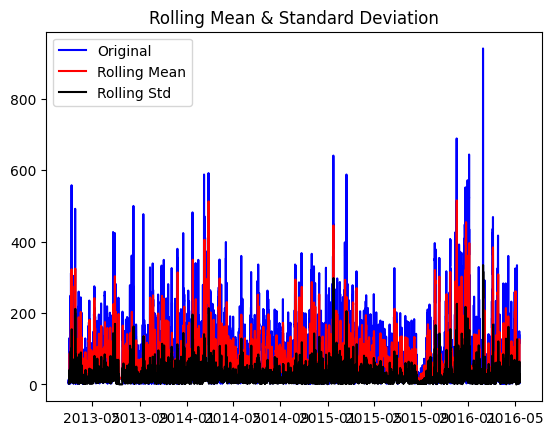

In [ ]:
#Plot rolling statistics - alterrnative visual to the ADF test*
orig = plt.plot(y_train, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### **seasonal decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

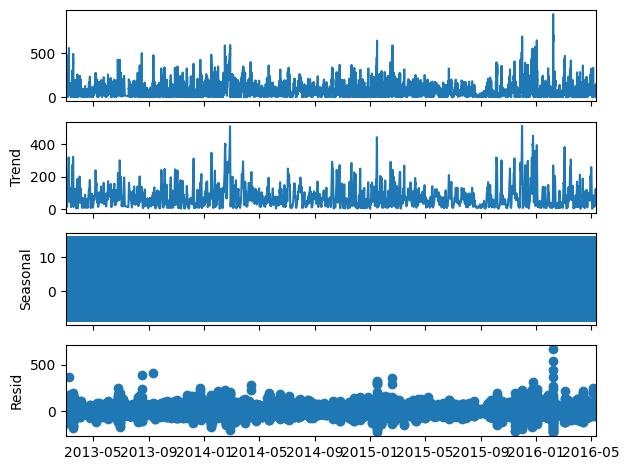

In [ ]:
seasonal_dec_additive=seasonal_decompose(y_train, model="additive", period=24)
seasonal_dec_additive.plot()
plt.show()

### **ACF & PACF**

-ACF & PACF graphs are used to find value of P & Q for ARIMA.

-P(auto regressive lags), d(order of differentiation),Q(moving avg.)

-The AR part is correlation between prev & current time periods.

-To smooth out the noise, the MA part is used.

The I part binds together the AR & MA parts.

-We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
df = df['PM2.5']

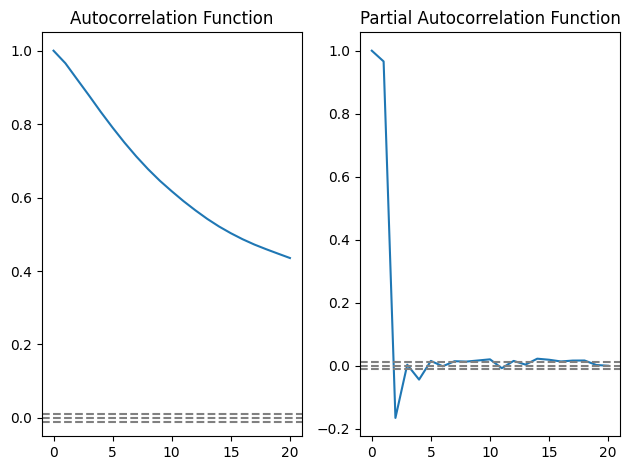

In [ ]:
#ACF & PACF plots
lag_acf = acf(y_train, nlags=20)
lag_pacf = pacf(y_train, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_train)), linestyle='--', color='gray')
plt.title('Autocorrelation Function') 

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_train)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()  

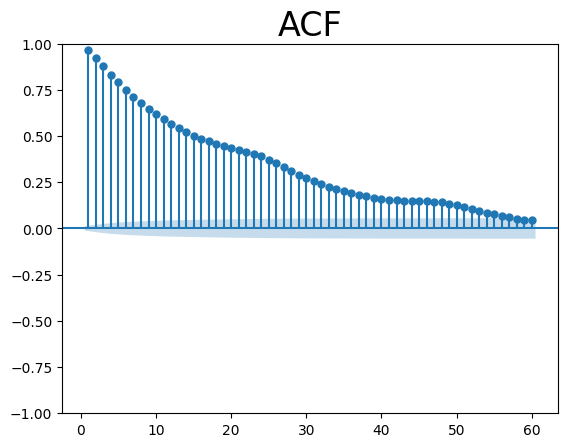

In [ ]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(y_train, lags=60, zero=False)
#lags=20 days behind
#zero=False means that it doesn't plot the relation between the model and itself
plt.title("ACF", size=24)
plt.show()

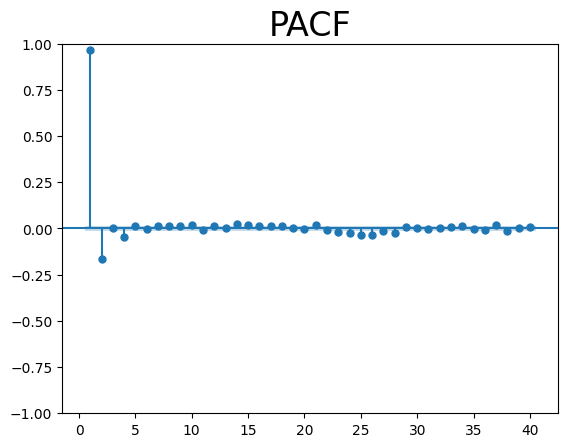

In [ ]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_pacf(y_train, lags=40, zero=False)
#lags=20 days behind
#zero=False means that it doesn't plot the relation between the model and itself
plt.title("PACF", size=24)
plt.show()

**Insight:** 

-From these:
* We see the curve passes the y=0 line at x=2; so the order **p** = **2**
* ACF curve doesn't cross the y=0 line, so **q** = **0**
* **d** should be **0** as the data is already stationary*

### **Baseline models**

In [ ]:
#Naive Forecast (Tomorrow’s value = Today’s value)

y_pred_naive = y_test.shift(1)  # just yesterday’s/hour-before value
naive_rmse = np.sqrt(mean_squared_error(y_test[1:], y_pred_naive[1:]))
print("Naive RMSE:", naive_rmse)


Naive RMSE: 19.54216075862629


In [ ]:
#Moving Average Forecast (average the last k observations)
#Predicts the next value as the mean of the last k values.
window = 24
y_pred_ma = y_test.rolling(window=window).mean()
ma_rmse = np.sqrt(mean_squared_error(y_test[window:], y_pred_ma[window:]))
print("Moving Average RMSE:", ma_rmse)

Moving Average RMSE: 56.20062271040231


In [ ]:
#Simple Exponential Smoothing (SES)
#Instead of equal weights (like MA), this gives more weight to recent observations.

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(y_train).fit(smoothing_level=0.2, optimized=False)
#train SES on y_train, then forecast forward for the length of the test set.

y_pred_ses = ses_model.forecast(len(y_test))
ses_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ses))
print("SES RMSE:", ses_rmse)


SES RMSE: 103.65915680450284


### **TS Models**

1. **ARIMA**

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit ARIMA(2,0,0) - From ACF/PACF
arima_model = sm.tsa.ARIMA(y_train, order=(2,0,0))
arima_result = arima_model.fit()

# Forecast on test set
y_pred_arima = arima_result.forecast(steps=len(y_test))

# Evaluate
arima_rmse = np.sqrt(mean_squared_error(y_test, y_pred_arima))
print("ARIMA(2,0,0) RMSE:", arima_rmse)


ARIMA(2,0,0) RMSE: 82.04864638433949


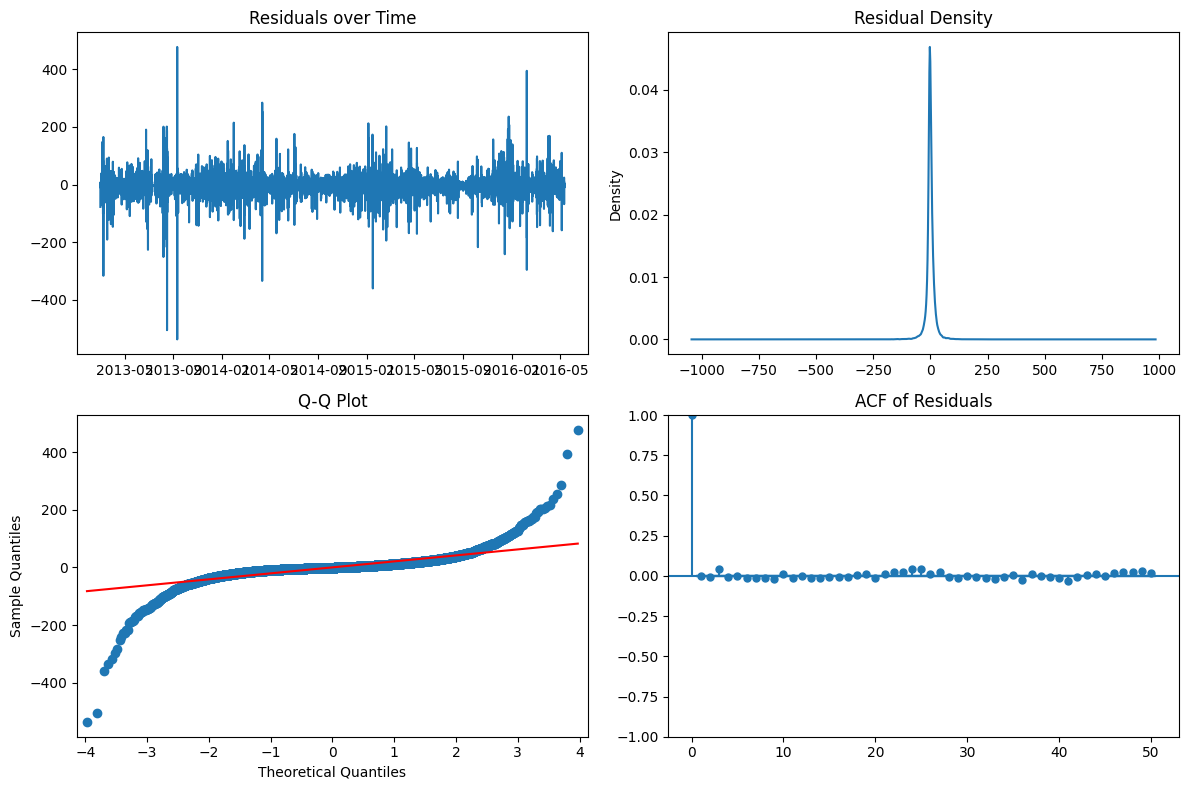

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

residuals = arima_result.resid

fig, axes = plt.subplots(2, 2, figsize=(12,8))

# 1. Residual time series
axes[0,0].plot(residuals)
axes[0,0].set_title("Residuals over Time")

# 2. Histogram + KDE
residuals.plot(kind='kde', ax=axes[0,1])
axes[0,1].set_title("Residual Density")

# 3. Q-Q plot
sm.qqplot(residuals, line='s', ax=axes[1,0])
axes[1,0].set_title("Q-Q Plot")

# 4. ACF plot
sm.graphics.tsa.plot_acf(residuals, lags=50, ax=axes[1,1])
axes[1,1].set_title("ACF of Residuals")

plt.tight_layout()
plt.show()

#Diagnostics ≈ the model “fits its own framework” properly.
#Residual plot → should look like random noise (no visible trend/seasonality).
#Histogram/KDE → should look roughly normal (bell-shaped).
#Q-Q plot → points should mostly lie on the diagonal.
#ACF of residuals → no significant spikes; all autocorrelations within the 95% confidence bounds.

### **Insights:**

-RMSE ≈ the model is not useful for forecasting compared to even a simple baseline.

-May mean important structure in the data is missing
* Seasonality (daily, weekly).
* Exogenous drivers (weather, pollutants).
* Or just the order (p,d,q) wasn’t rich enough.

In [ ]:
arima_result = arima_model.fit()

arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                28051
Model:                 ARIMA(2, 0, 0)   Log Likelihood             -124879.502
Date:                Fri, 26 Sep 2025   AIC                         249767.004
Time:                        20:13:03   BIC                         249799.971
Sample:                    03-01-2013   HQIC                        249777.616
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2496      4.028     19.925      0.000      72.356      88.143
ar.L1          1.1266      0.002    741.644      0.000       1.124       1.130
ar.L2         -0.1663      0.001   -115.000      0.000      -0.169      -0.163
sigma2       430.8703      0.759    567.565      0.000     429.382     432.358
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           6140053.45
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        75.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

results = []

#loop p,d,q
for p in range(4):       # 0–3
    for d in range(2):   # 0–1
        for q in range(4):   # 0–3
            try:
                model = ARIMA(y_train, order=(p,d,q))
                res = model.fit()

                # Forecast same length as test set
                forecast = res.forecast(steps=len(y_test))
                rmse = np.sqrt(mean_squared_error(y_test, forecast))

                results.append({
                    "order": (p,d,q),
                    "aic": res.aic,
                    "bic": res.bic,
                    "rmse": rmse
                })
            except:
                continue

#  DataFrame for easy ranking
df_results = pd.DataFrame(results)

# Sort by RMSE first, then AIC 
df_sorted = df_results.sort_values(by=["rmse", "aic"]).reset_index(drop=True)

print(df_sorted.head(10))  # top 10 


       order            aic            bic       rmse
0  (2, 1, 2)  249765.568323  249806.777042  81.971416
1  (3, 1, 3)  249741.098014  249798.790222  81.977508
2  (1, 1, 3)  249769.677067  249810.885786  82.003170
3  (1, 0, 0)  250552.001312  250576.726650  82.020449
4  (1, 0, 1)  249773.091804  249806.058923  82.044171
5  (1, 0, 2)  249772.288456  249813.497354  82.045533
6  (3, 0, 1)  249745.592263  249795.042941  82.046692
7  (2, 0, 1)  249768.557802  249809.766700  82.047716
8  (3, 0, 0)  249768.799484  249810.008382  82.048225
9  (2, 0, 0)  249767.004152  249799.971271  82.048646


**check out the best performed order *(2,1,2)***

ARIMA(2,0,0) RMSE: 82.04864638433949
ARIMA(2,1,2) RMSE: 81.97141586283719


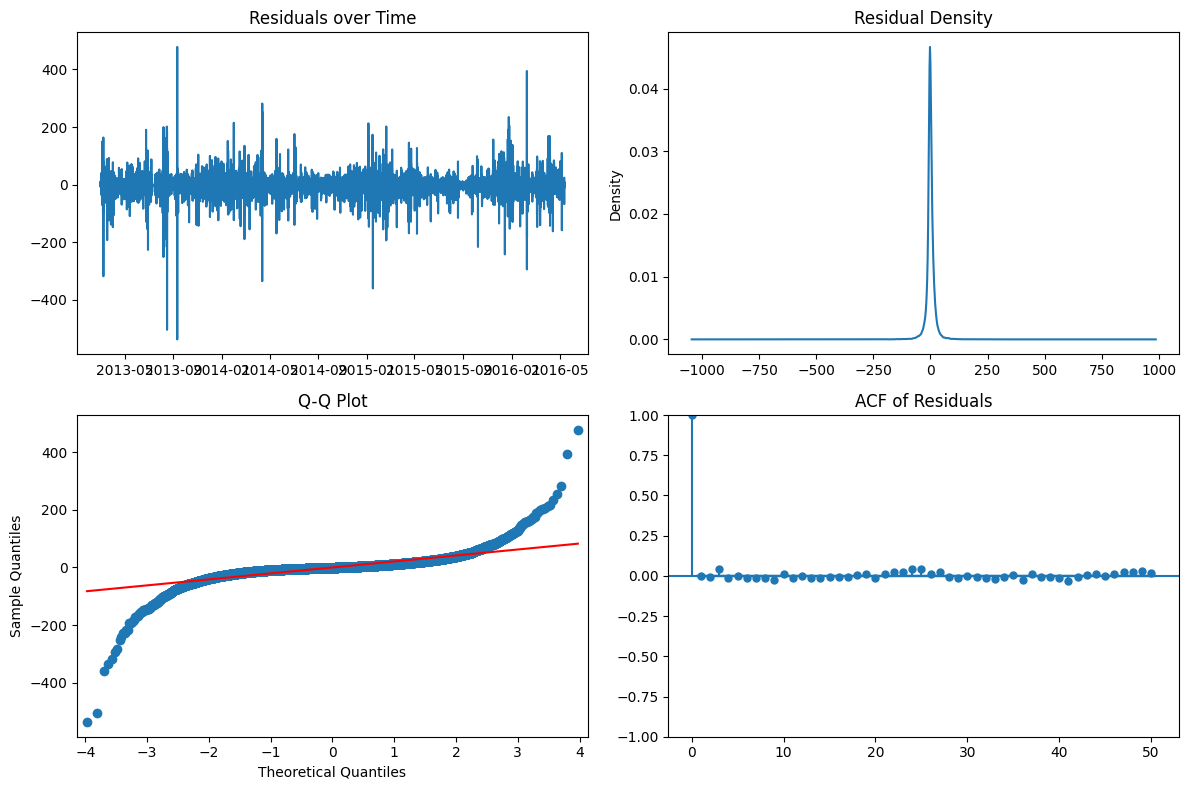

In [ ]:
#check out the best performed order
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit ARIMA
arima_model = sm.tsa.ARIMA(y_train, order=(2,1,2))
arima_result = arima_model.fit()

# Forecast on test set
y_pred_arima = arima_result.forecast(steps=len(y_test))

# Evaluate
arima_rmse = np.sqrt(mean_squared_error(y_test, y_pred_arima))
print("ARIMA(2,0,0) RMSE: 82.04864638433949")
print("ARIMA(2,1,2) RMSE:", arima_rmse)

import matplotlib.pyplot as plt
import statsmodels.api as sm

residuals = arima_result.resid

fig, axes = plt.subplots(2, 2, figsize=(12,8))

# 1. Residual time series
axes[0,0].plot(residuals)
axes[0,0].set_title("Residuals over Time")

# 2. Histogram + KDE
residuals.plot(kind='kde', ax=axes[0,1])
axes[0,1].set_title("Residual Density")

# 3. Q-Q plot
sm.qqplot(residuals, line='s', ax=axes[1,0])
axes[1,0].set_title("Q-Q Plot")

# 4. ACF plot
sm.graphics.tsa.plot_acf(residuals, lags=50, ax=axes[1,1])
axes[1,1].set_title("ACF of Residuals")

plt.tight_layout()
plt.show()

#Diagnostics ≈ the model “fits its own framework” properly.
#Residual plot → should look like random noise (no visible trend/seasonality).
#Histogram/KDE → should look roughly normal (bell-shaped).
#Q-Q plot → points should mostly lie on the diagonal.
#ACF of residuals → no significant spikes; all autocorrelations within the 95% confidence bounds.


2. **AUTO-ARIMA**

In [ ]:
# from pmdarima import auto_arima

# auto_model = auto_arima(
#     y_train,
#     start_p=0, max_p=3,
#     start_q=0, max_q=3,
#     d=None,            # let it decide differencing
#     seasonal=False,    # plain ARIMA first
#     stepwise=True,     # faster search
#     trace=True         # print progress
# )

# print(auto_model.summary())


3. **SARIMA**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA
sarima = SARIMAX(y_train, 
                 order=(2,1,2), 
                 seasonal_order=(1,1,1,24))
sarima_results = sarima.fit()

sarima_results.summary()

In [ ]:
df

datetime
2013-03-01 00:00:00     3.0
2013-03-01 01:00:00    12.0
2013-03-01 02:00:00    14.0
2013-03-01 03:00:00    12.0
2013-03-01 04:00:00    12.0
                       ... 
2017-02-28 19:00:00    27.0
2017-02-28 20:00:00    47.0
2017-02-28 21:00:00    18.0
2017-02-28 22:00:00    18.0
2017-02-28 23:00:00    15.0
Freq: h, Name: PM2.5, Length: 35064, dtype: float64

                                      SARIMAX Results                                      
Dep. Variable:                               PM2.5   No. Observations:                 1168
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 7)   Log Likelihood               -6265.563
Date:                             Fri, 26 Sep 2025   AIC                          12545.126
Time:                                     21:22:27   BIC                          12580.458
Sample:                                 03-01-2013   HQIC                         12558.463
                                      - 05-11-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5307      0.159      3.329      0.001       0.218       0.843
ar.L2         -0.1356      

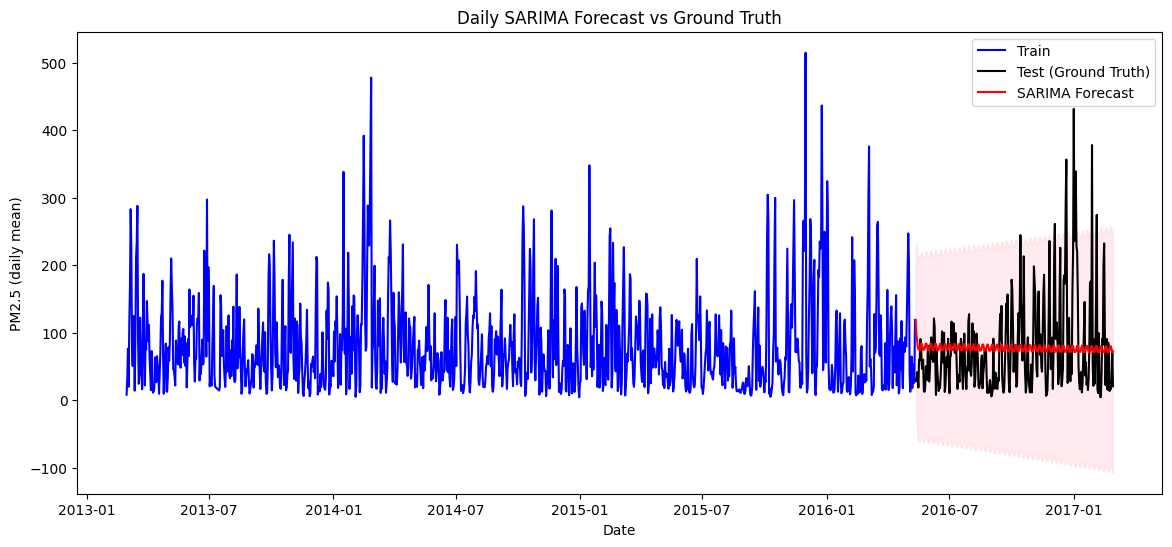

In [ ]:
#consider daily seasonality =! hourly
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np


# 1. Resample to daily averages
df_daily = df.resample('D').mean()

#2. Train-test split (80/20)

train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]


# 3. Fit SARIMA
# 7 days (weekly seasonality)
sarima_model = sm.tsa.SARIMAX(
    train,
    order=(2,1,2),                # ARIMA terms
    seasonal_order=(1,1,1,7),     # weekly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result = sarima_model.fit(disp=False)

print(sarima_result.summary())


# 4. Forecast
n_forecast = len(test)
forecast = sarima_result.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 5. Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
print(f"SARIMA RMSE (daily): {rmse:.2f}")

# 6. Visualize
plt.figure(figsize=(14,6))

# Train vs test
plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Test" , color="black")

# Forecast
plt.plot(forecast_mean.index, forecast_mean, label="SARIMA Forecast", color="red")

# Confidence intervals
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color="pink", alpha=0.3
)

plt.title("Daily SARIMA Forecast vs Ground Truth")
plt.xlabel("Date")
plt.ylabel("PM2.5 (daily mean)")
plt.legend()
plt.show()


In [ ]:
sarima_results.summary()

In [ ]:
# Visualize: Train/Test Split + Fitted + Forecast vs Actual
plt.figure(figsize=(14,6))

# 1. Original full daily series
plt.plot(df_daily.index, df_daily, label="Original Data", color="black")

# 2. Train/Test split marker
split_idx = len(train)
plt.axvline(df_daily.index[split_idx], color="red", linestyle="--", label="Train/Test Split")

# 3. In-sample fitted values
plt.plot(train.index, sarima_result.fittedvalues, label="In-sample Fit", color="blue")

# 4. Out-of-sample forecast
plt.plot(test.index, forecast_mean, label="SARIMA Forecast", color="green")

# 5. Confidence intervals for forecast
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color="green", alpha=0.2
)

# 6. Actual test values 
plt.plot(test.index, test, label="Actual Test Data", color="orange", linestyle="dashed")

plt.title("Daily SARIMA: Train/Test Split, In-sample Fit, Out-of-sample Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("PM2.5 (daily mean)")
plt.legend()
plt.show()

In [ ]:
# import warnings
# import numpy as np
# import pandas as pd
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error

# warnings.filterwarnings("ignore")

# sar_results = []

# # Non-seasonal orders (p,d,q)
# p = d = q = range(0, 3)

# # Seasonal orders (P,D,Q) with seasonal period (s)
# P = D = Q = range(0, 2)
# s = 124 #freq = 'h'

# for i in p:
#     for j in d:
#         for k in q:
#             for I in P:
#                 for J in D:
#                     for K in Q:
#                         order = (i,j,k)
#                         seasonal_order = (I,J,K,s)
#                         try:
#                             model = SARIMAX(
#                                 y_train,
#                                 order=order,
#                                 seasonal_order=seasonal_order,
#                                 enforce_stationarity=False,
#                                 #allowed to estimate parameters that could be non-stationary
#                                 enforce_invertibility=False
#                             )
#                             res = model.fit(disp=False)

#                             # Forecast and compute RMSE
#                             forecast = res.forecast(steps=len(y_test))
#                             rmse = np.sqrt(mean_squared_error(y_test, forecast))

#                             results.append({
#                                 "order": order,
#                                 "seasonal_order": seasonal_order,
#                                 "aic": res.aic,
#                                 "bic": res.bic,
#                                 "rmse": rmse
#                             })
#                         except:
#                             continue

# # Put results in DataFrame
# df_results = pd.DataFrame(sar_results)

# # Sort by RMSE, then AIC
# df_sorted = df_results.sort_values(by=["rmse", "aic"]).reset_index(drop=True)

# print(df_sorted.head(10))  # top 10 models


In [ ]:
# import matplotlib.pyplot as plt

# # Picks the best SARIMA model
# best_order = tuple(df_sorted.iloc[0]["order"])
# #tuple - right format for SARIMAX.
# #iloc[0] picks row one - index 0 (implicit)
# best_seasonal = tuple(df_sorted.iloc[0]["seasonal_order"])

# print("Best SARIMA model:", best_order, best_seasonal)

# # Refit on training set *****thissssss
# best_model = SARIMAX(
#     y_train,
#     order=best_order,
#     seasonal_order=best_seasonal,
#     enforce_stationarity=False,
#     enforce_invertibility=False
# ).fit(disp=False)

# # In-sample fitted values (on train)
# train_pred = best_model.fittedvalues

# # Out-of-sample forecast (on test horizon)
# test_forecast = best_model.forecast(steps=len(y_test))

# # Full forecast (train+test)
# full_forecast = pd.concat([train_pred, test_forecast])

In [ ]:
# #  Visualization 
# fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# # 1. Train-test split visualization
# axs[0].plot(y_train, label="Train", color="blue")
# axs[0].plot(y_test, label="Test", color="orange")
# axs[0].set_title("Train-Test Split")
# axs[0].legend()

# # 2. In-sample fit
# axs[1].plot(y_train, label="Train", color="blue")
# axs[1].plot(train_pred, label="In-sample Fit", color="red", linestyle="--")
# axs[1].set_title("In-sample Fit")
# axs[1].legend()

# # 3. Out-of-sample forecast
# axs[2].plot(y, label="Actual (Train+Test)", color="blue")
# axs[2].plot(full_forecast, label="Forecast (Train Fit + Test Prediction)", color="green", linestyle="--")
# axs[2].axvline(y_train.index[-1], color="black", linestyle=":", label="Train-Test Split")
# axs[2].set_title("Full Forecast vs Actuals")
# axs[2].legend()

# plt.tight_layout()
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Forecast out-of-sample
# forecast = sar_results.get_forecast(steps=len(y_test))
# forecast_mean = forecast.predicted_mean
# forecast_ci = forecast.conf_int()

# # Plot everything
# plt.figure(figsize=(12,6))

# # 1. Original data
# plt.plot(y, label="Original Data", color="black")

# # 2. Train / test split marker
# split_idx = len(y_train)
# plt.axvline(y.index[split_idx], color="red", linestyle="--", label="Train/Test Split")

# # 3. In-sample fitted values
# plt.plot(sar_results.fittedvalues, label="In-sample (fitted)", color="blue")

# # 4. Out-of-sample forecasts
# plt.plot(y_test.index, forecast_mean, label="Out-of-sample Forecast", color="green")
# plt.fill_between(y_test.index,
#                  forecast_ci.iloc[:,0],
#                  forecast_ci.iloc[:,1],
#                  color="green", alpha=0.2)

# # 3. In-sample fitted values
# plt.plot(sarima_res.fittedvalues, label="In-sample (fitted)", color="blue")

# # 4. Out-of-sample forecast (model predictions)
# plt.plot(y_test.index, forecast_mean, label="Forecast (Out-of-sample)", color="green")

# # 5. Confidence intervals for forecast
# plt.fill_between(y_test.index,
#                  forecast_ci.iloc[:,0],
#                  forecast_ci.iloc[:,1],
#                  color="green", alpha=0.2)

# # 6. Actual test values (ground truth)
# plt.plot(y_test.index, y_test, label="Actual Test Data", color="orange", linestyle="dashed")

# plt.legend()
# plt.title("SARIMA Model: Train/Test Split, In-sample Fit, Out-of-sample Forecast vs Actual")
# plt.show()
# # 
